# Assessment 1

This is the first assessed mini-project. When electrons $(e^-)$ and positrons $(e^+)$ collide together they sometimes produce two muons $(\mu^- , \mu^+)$ that come out of the collision back-to-back. The angle between the incoming $e^+$ and the outgoing $\mu^+$ is defined to be $\theta$. See the figure below:
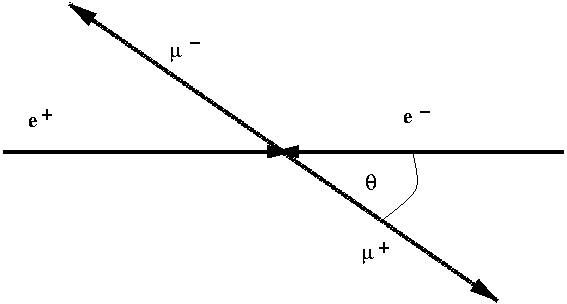

If the energy of the $e^-e^+$ collision is a long way below the mass of the $Z$ boson then $\theta$ has a distribution of $1+\cos^2\theta$. However, as the centre of mass energy of the collision approaches that of the $Z$ boson an asymmetry appears and the distribution becomes $\cal{A}(1+\cos^2\theta) + \cal{B} \cos \theta$ which can be written $(1+\cos^2\theta) + \dfrac{\cal{B}}{\cal{A}}\cos \theta$. The ratio $\dfrac{\cal{B}}{\cal{A}}= \kappa$ varies greatly (up to a maximum of ~10%) around the collision energies near the centre of mass of the $Z$ boson and even changes sign. In the 1990s measuring these assymetries was an important scientific goal as they told us much about electroweak unification.

In the early 1990s the LEP collider at CERN was one of the first  $e^-e^+$ colliders to run near the $Z$ mass. 
The aim of the mini-project is to determine how well the experiments could measure $\kappa$ in three different scenarios:

1. When LEP started running each experiment would collect a few 10s of these events/day and (say) would run for 100 days a year.

2. A couple of years later each experiment would collect a few 100s of these events/day and (say) would run for 100 days a year.

3. A couple of years later again each experiment would collect a few 1000s of these events/day and (say) would run for 100 days a year.

You should consider (and simulate) three different values for $\kappa = \pm 0.07$ and $0$. You should fit your simulation to consider how well you can tell them apart and what precision can you make on the individual measurements. 



## Assessment Criteria

You will submit a jupyter-notebook that is both a record of your analysis (so that we can run your code to verify your findings) and a description of what you have found out. 
You have an overall mark out of 20 that will have two components (each out of 10). These are:

### Technical achievement
This will be a judge of: how well you have modelled the situation and the techiques that you have used, the quality of your code, how well you have analysed the data etc

### Communicating your results
This will be a judge of: how well you have understood what you have seen, how well you have communicated your understanding (this includes clarity of explanation and presentational aspects of the plots) etc


In order to to determine how well the experiments could measure $\kappa$ in three different scenarios, use Monte Carlo method to simulate data from theoritical distributions. Then fit the binned data sets according to the given model, compare the $\kappa$ we got with the theoritical $\kappa$.

1. Simulation

To simulate the first scenario: When LEP started running each experiment would collect a few 10s of these events/day and would run for 100 days a year, we generate N=1000 uniform random numbers to represent 1000 events collected in one experiment. First, normalize the distribution. Integrate $f(\theta)=1+cos^2\theta+\kappa\cos\theta$ from 0 to $\pi$:
   $$
   \int_{0}^{\pi}{(1+cos^2\theta+\kappa\cos\theta)}d\theta=3\pi/2
   $$
   So real pdf functions have a common constant normalization parameters $2/3\pi$. Consider $\kappa=\pm0.07$ and $0$, we generate 3 data sets according to the given distributions.The angle $\theta$ ranges from 0 to $\pi$. 

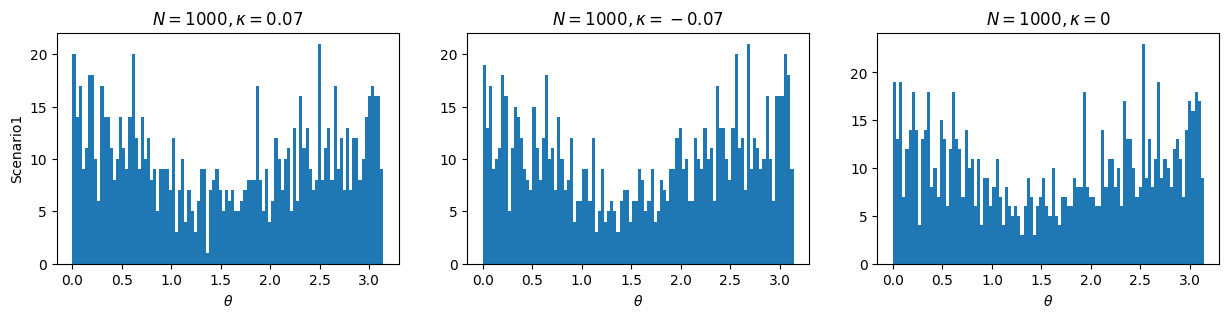

In [178]:
import numpy as np
import pylab as pl
import numpy.random as npr 
import scipy.interpolate as spi
import matplotlib as plt
#generate data
#integrate numerically
pl.rcParams['figure.figsize'] = [15, 3] 
theta=np.arange(0,np.pi,0.0001) 
kappa1=0.07
#normalising the cumulative sum
xpdf1=2/(3*np.pi)*(kappa1*np.cos(theta)+(np.cos(theta))**2+1)
y1=xpdf1.cumsum()
y1=y1/y1[-1] 
#interpolate with cubic spline
f1 = spi.CubicSpline(y1,theta) 
# now generate the uniform random numbers
yrs1=npr.uniform(size=1000)
s1xr1=f1(yrs1)

#change kappa
kappa2=-0.07
xpdf2=kappa2*np.cos(theta)+(np.cos(theta))**2+1
y2=xpdf2.cumsum()
y2=y2/y2[-1] 
f2 = spi.CubicSpline(y2,theta) 
s1xr2=f2(yrs1)
xpdf3=(np.cos(theta))**2+1
y3=xpdf3.cumsum()
y3=y3/y3[-1] 
f3 = spi.CubicSpline(y3,theta) 
s1xr3=f3(yrs1)
pl.subplot(1,3,1)
pl.hist(s1xr1,bins=100)
pl.xlabel(r"$\theta$")
pl.ylabel("Scenario1")
pl.title("$N=1000,\kappa=0.07$")
pl.subplot(1,3,2)
pl.hist(s1xr2,bins=100)
pl.xlabel(r"$\theta$")
pl.title("$N=1000,\kappa=-0.07$")
pl.subplot(1,3,3)
pl.hist(s1xr3,bins=100)
pl.xlabel(r"$\theta$")
pl.title("$N=1000,\kappa=0$")
pl.show()

Change N=10000,100000, then repeat the process and simulate 6 data sets for another 2 scenarios.

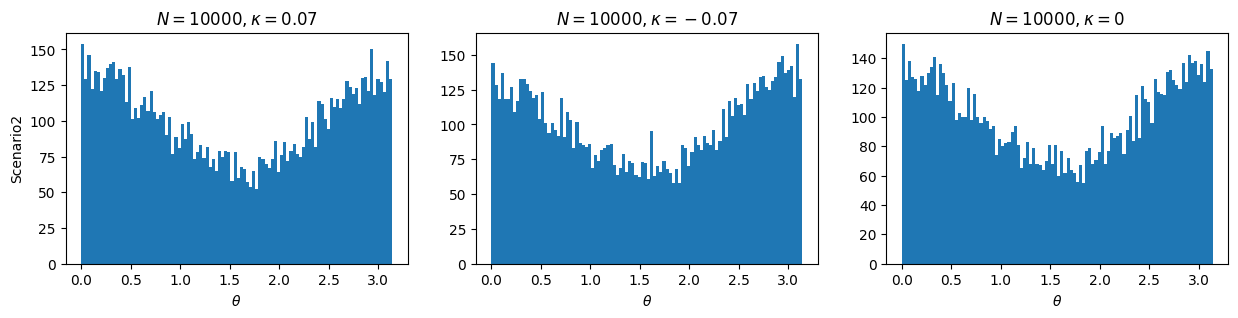

In [106]:
#Scenario2, when N=10000
pl.rcParams['figure.figsize'] = [15, 3] 
yrs2=npr.uniform(size=10000)
s2xr1=f1(yrs2)
s2xr2=f2(yrs2)
s2xr3=f3(yrs2)
pl.subplot(1,3,1)
pl.hist(s2xr1,bins=100)
pl.xlabel(r"$\theta$")
pl.ylabel("Scenario2")
pl.title("$N=10000,\kappa=0.07$")
pl.subplot(1,3,2)
pl.hist(s2xr2,bins=100)
pl.xlabel(r"$\theta$")
pl.title("$N=10000,\kappa=-0.07$")
pl.subplot(1,3,3)
pl.hist(s2xr3,bins=100)
pl.xlabel(r"$\theta$")
pl.title("$N=10000,\kappa=0$")
pl.show()

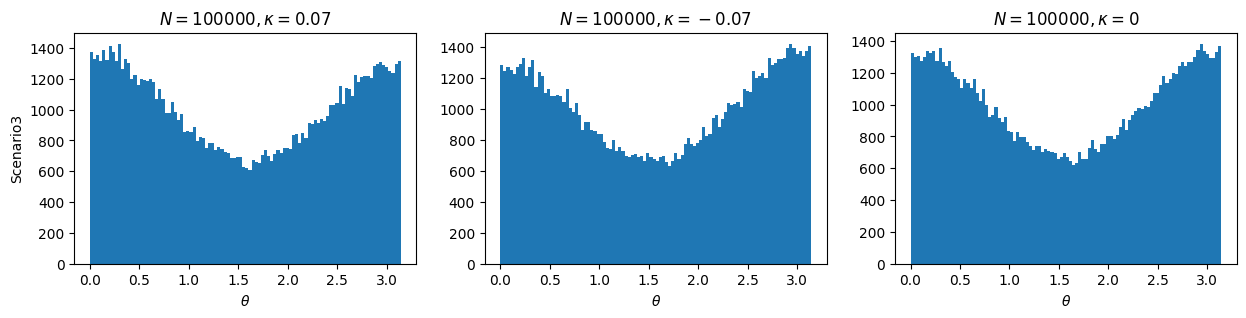

In [107]:
#Scenario3, when N=100000
pl.rcParams['figure.figsize'] = [15, 3] 
yrs3=npr.uniform(size=100000)
s3xr1=f1(yrs3)
s3xr2=f2(yrs3)
s3xr3=f3(yrs3)
pl.subplot(1,3,1)
pl.hist(s3xr1,bins=100)
pl.xlabel(r"$\theta$")
pl.ylabel("Scenario3")
pl.title("$N=100000,\kappa=0.07$")
pl.subplot(1,3,2)
pl.hist(s3xr2,bins=100)
pl.xlabel(r"$\theta$")
pl.title("$N=100000,\kappa=-0.07$")
pl.subplot(1,3,3)
pl.hist(s3xr3,bins=100)
pl.xlabel(r"$\theta$")
pl.title("$N=100000,\kappa=0$")
pl.show()

2. Fit the binned data\
   Use the maximum-likelihood method to fit the binned data. Calculate the cumulative distribution functions $F(\theta)$:
   $$
   F(\theta)= \frac{2}{3\pi}\int_{0}^{\theta}{(1+cos^2u+\kappa cosu)}du=\frac{2}{3\pi}*[3\theta/2+sin(2\theta)/4+\kappa sin\theta]
   $$

In [118]:
from iminuit import cost, Minuit

#Data fitting in Scenario 1, N=1000,kappa=0.07
n1s1, xe1s1 = np.histogram(s1xr1, bins=50, range=(0,np.pi))
def cdf(x, kappa):
    return 2/(3*np.pi)*(1.5*x+0.25*np.sin(2*x)+kappa*np.sin(x))
def pdf(x,kappa):
    return 2/(3*np.pi)*(1+np.cos(x)**2+kappa*np.cos(x))
c1s1 = cost.BinnedNLL(n1s1, xe1s1, cdf)
m1s1 = Minuit(c1s1, kappa=0.01)
m1s1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 50.46 (χ²/ndof = 1.0)      │              Nfcn = 15               │
│ EDM = 2.23e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.13    │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────┐
│       │   kappa │
├───────┼─────────┤
│ kappa │ 0.00512 │
└───────┴─────────┘

In [121]:
#kappa=-0.07
n2s1, xe2s1 = np.histogram(s1xr2, bins=50, range=(0,np.pi))
c2s1 = cost.BinnedNLL(n2s1, xe2s1, cdf)
m2s1 = Minuit(c2s1, kappa=0.01)
m2s1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 63.62 (χ²/ndof = 1.3)      │              Nfcn = 15               │
│ EDM = 3.63e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   -0.02   │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────┐
│       │   kappa │
├───────┼─────────┤
│ kappa │ 0.00516 │
└───────┴─────────┘

In [122]:
#kappa=0
n3s1, xe3s1 = np.histogram(s1xr3, bins=50, range=(0,np.pi))
c3s1 = cost.BinnedNLL(n3s1, xe3s1, cdf)
m3s1 = Minuit(c3s1, kappa=0.01)
m3s1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 58.73 (χ²/ndof = 1.2)      │              Nfcn = 15               │
│ EDM = 4.62e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.06    │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────┐
│       │   kappa │
├───────┼─────────┤
│ kappa │ 0.00514 │
└───────┴─────────┘

In [123]:
#data fitting in scenario 2(N=10000), kappa=0.07
n1s2, xe1s2 = np.histogram(s2xr1, bins=50, range=(0,np.pi))
c1s2 = cost.BinnedNLL(n1s2, xe1s2, cdf)
m1s2 = Minuit(c1s2, kappa=0.01)
m1s2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 39.01 (χ²/ndof = 0.8)      │              Nfcn = 13               │
│ EDM = 9.67e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.068   │   0.023   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    kappa │
├───────┼──────────┤
│ kappa │ 0.000511 │
└───────┴──────────┘

In [124]:
#data fitting in scenario 2(N=10000), kappa=-0.07
n2s2, xe2s2 = np.histogram(s2xr2, bins=50, range=(0,np.pi))
c2s2 = cost.BinnedNLL(n2s2, xe2s2, cdf)
m2s2 = Minuit(c2s2, kappa=0.01)
m2s2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 38.3 (χ²/ndof = 0.8)       │              Nfcn = 13               │
│ EDM = 3.6e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │  -0.072   │   0.023   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    kappa │
├───────┼──────────┤
│ kappa │ 0.000512 │
└───────┴──────────┘

In [125]:
#data fitting in scenario 2(N=10000), kappa=0
n3s2, xe3s2 = np.histogram(s2xr3, bins=50, range=(0,np.pi))
c3s2 = cost.BinnedNLL(n3s2, xe3s2, cdf)
m3s2 = Minuit(c3s2, kappa=0.01)
m3s2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.91 (χ²/ndof = 0.6)      │              Nfcn = 13               │
│ EDM = 2.07e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │  -0.002   │   0.023   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    kappa │
├───────┼──────────┤
│ kappa │ 0.000512 │
└───────┴──────────┘

In [127]:
#data fitting in scenario 3(N=100000), kappa=0.07
n1s3, xe1s3 = np.histogram(s3xr1, bins=50, range=(0,np.pi))
c1s3 = cost.BinnedNLL(n1s3, xe1s3, cdf)
m1s3 = Minuit(c1s3, kappa=0.01)
m1s3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 55.64 (χ²/ndof = 1.1)      │              Nfcn = 13               │
│ EDM = 4.87e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.066   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    kappa │
├───────┼──────────┤
│ kappa │ 5.12e-05 │
└───────┴──────────┘

In [128]:
#data fitting in scenario 3(N=100000), kappa=-0.07
n2s3, xe2s3 = np.histogram(s3xr2, bins=50, range=(0,np.pi))
c2s3 = cost.BinnedNLL(n2s3, xe2s3, cdf)
m2s3 = Minuit(c2s3, kappa=0.01)
m2s3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 67.56 (χ²/ndof = 1.4)      │              Nfcn = 13               │
│ EDM = 2.11e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │  -0.074   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    kappa │
├───────┼──────────┤
│ kappa │ 5.12e-05 │
└───────┴──────────┘

In [129]:
#data fitting in scenario 3(N=100000), kappa=0
n3s3, xe3s3 = np.histogram(s3xr3, bins=50, range=(0,np.pi))
c3s3 = cost.BinnedNLL(n3s3, xe3s3, cdf)
m3s3 = Minuit(c3s3, kappa=0.01)
m3s3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 49.63 (χ²/ndof = 1.0)      │              Nfcn = 13               │
│ EDM = 1.4e-08 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │  -0.004   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    kappa │
├───────┼──────────┤
│ kappa │ 5.12e-05 │
└───────┴──────────┘

3. Discussion of results\
   (1) Scenario 1, when we collect 1000 events. \
   We note that the $\kappa_{f}$ obtained from the fitting are in significant error from the true values $\kappa_{r}$ on which the simulation is based. From the visualised images, it is also difficult to distinguish between the different $\kappa$. To investigate the fit status, we analyze hesse error of every fitting process, then calculate the reduced $\chi^2$. Visualize the three fittting results in 1 plot. The reduced $\chi^2$ is larger than 1, indicates that the data variance is underestimated. Therefore, we speculate that in this scenario, when the number of events collected is too small, the simulation using the Monte Carlo method can not generate a dataset that matches the theoretical distribution very accurately. What's more, we cannot fit the data accurately due to the limited data numbers. We could not measure $\kappa$ in this scenario precisely, the error of the experiment is extremely high.


┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.13    │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   -0.02   │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬───────

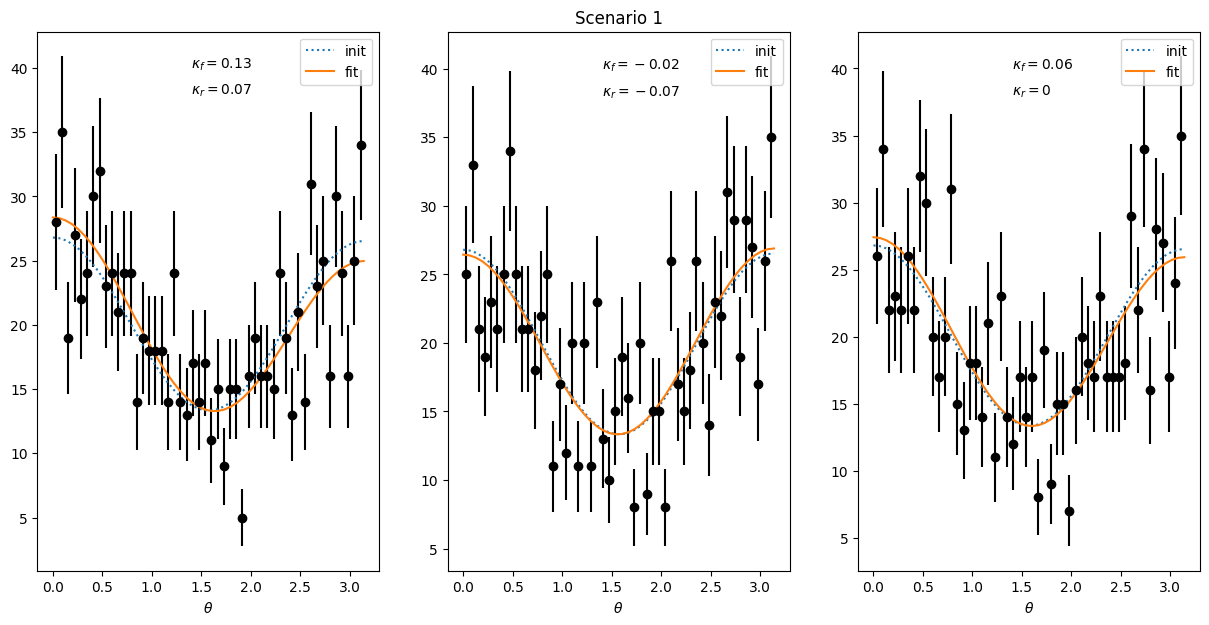

In [170]:
#Investigate the fit process in scenario 1
print(m1s1.params)
print(m2s1.params)
print(m3s1.params)
print("reduced chi2=", m1s1.fval / (len(n1s1) - m1s1.nfit) )
print("reduced chi2=", m2s1.fval / (len(n2s1) - m2s1.nfit) )
print("reduced chi2=", m3s1.fval / (len(n3s1) - m3s1.nfit) )
pl.rcParams['figure.figsize'] = [15, 7]
pl.subplot(1,3,1)
cx1s1 = 0.5 * (xe1s1[1:] + xe1s1[:-1])
dx1s1 = np.diff(xe1s1)
plt.errorbar(cx1s1, n1s1, n1s1 ** 0.5, fmt="ok")
xm1s1 = np.linspace(xe1s1[0], xe1s1[-1])
plt.plot(xm1s1, pdf(xm1s1, *[p.value for p in m1s1.init_params]) * len(s1xr1) * dx1s1[0],
         ls=":", label="init")
plt.plot(xm1s1, pdf(xm1s1, *m1s1.values) * len(s1xr1) * dx1s1[0], label="fit")
plt.legend()
plt.text(1.4,40,"$\kappa_{f}=0.13$")
plt.text(1.4,38,"$\kappa_{r}=0.07$")
plt.xlabel(r"$\theta$")
pl.subplot(1,3,2)
cx2s1 = 0.5 * (xe2s1[1:] + xe2s1[:-1])
dx2s1 = np.diff(xe2s1)
plt.errorbar(cx2s1, n2s1, n2s1 ** 0.5, fmt="ok")
xm2s1 = np.linspace(xe2s1[0], xe2s1[-1])
plt.plot(xm2s1, pdf(xm2s1, *[p.value for p in m2s1.init_params]) * len(s1xr2) * dx2s1[0],
         ls=":", label="init")
plt.plot(xm2s1, pdf(xm2s1, *m2s1.values) * len(s1xr2) * dx2s1[0], label="fit")
plt.legend()
plt.text(1.4,40,"$\kappa_{f}=-0.02$")
plt.text(1.4,38,"$\kappa_{r}=-0.07$")
plt.xlabel(r"$\theta$")
plt.title("Scenario 1")
pl.subplot(1,3,3)
cx3s1 = 0.5 * (xe3s1[1:] + xe3s1[:-1])
dx3s1 = np.diff(xe3s1)
plt.errorbar(cx3s1, n3s1, n3s1 ** 0.5, fmt="ok")
xm3s1 = np.linspace(xe3s1[0], xe3s1[-1])
plt.plot(xm3s1, pdf(xm3s1, *[p.value for p in m3s1.init_params]) * len(s1xr3) * dx3s1[0],
         ls=":", label="init")
plt.plot(xm3s1, pdf(xm3s1, *m3s1.values) * len(s1xr3) * dx3s1[0], label="fit")
plt.legend()
plt.text(1.4,40,"$\kappa_{f}=0.06$")
plt.text(1.4,38,"$\kappa_{r}=0$")
plt.xlabel(r"$\theta$");

   (2) Scenario 2, when we collect 10000 events. \
   When increasing numbers of events, the Hesse errors decrease, indicating that the uncertainty of fitting results decreased--- the fit process is better than scenario 1. The error between $\kappa_{f}$ obtained from the fitting and the true values $\kappa_{r}$ on which the simulation is based decrease significantly. We can easily tell the different $\kappa$ apart according to the fitting results. In conclusion, the experiment in this scenario can measure $\kappa$ with the error about 2.9%. The uncertainty may mainly comes from the simulation process, but also from the fitting process.

┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.068   │   0.023   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │  -0.072   │   0.023   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬───────

Text(0.5, 0, '$\\theta$')

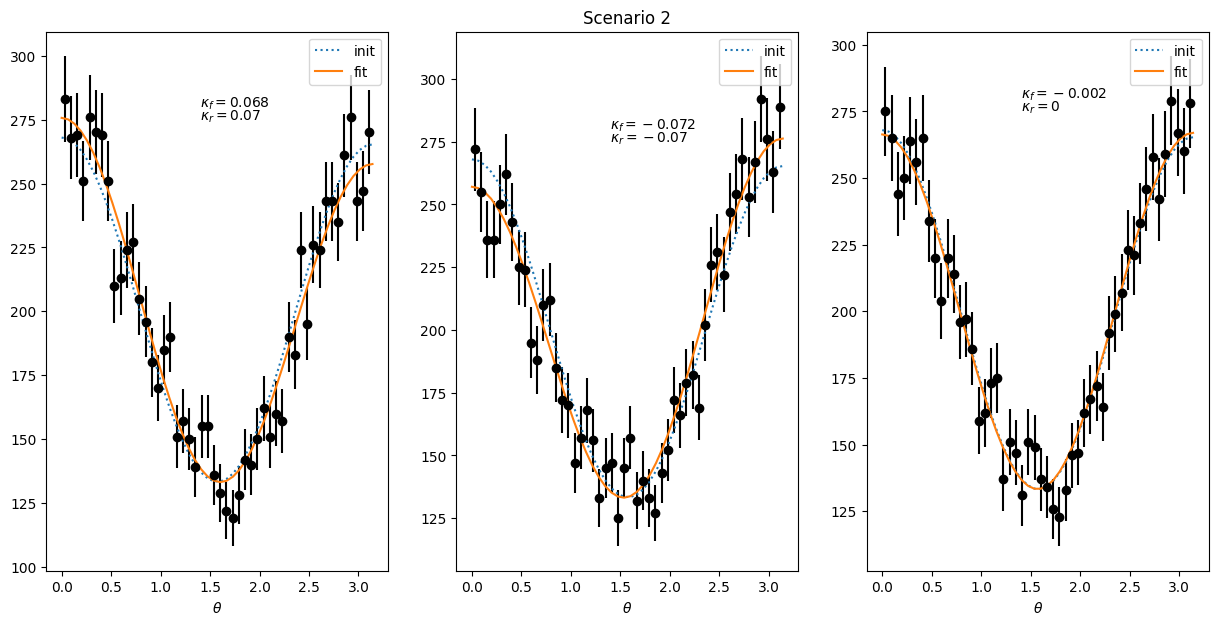

In [173]:
#Investigate the fit process in scenario 2
print(m1s2.params)
print(m2s2.params)
print(m3s2.params)
print("reduced chi2=", m1s2.fval / (len(n1s2) - m1s2.nfit) )
print("reduced chi2=", m2s2.fval / (len(n2s2) - m2s2.nfit) )
print("reduced chi2=", m3s2.fval / (len(n3s2) - m3s2.nfit) )
pl.rcParams['figure.figsize'] = [15, 7]
pl.subplot(1,3,1)
cx1s2 = 0.5 * (xe1s2[1:] + xe1s2[:-1])
dx1s2 = np.diff(xe1s2)
plt.errorbar(cx1s2, n1s2, n1s2 ** 0.5, fmt="ok")
xm1s2 = np.linspace(xe1s2[0], xe1s2[-1])
plt.plot(xm1s2, pdf(xm1s2, *[p.value for p in m1s2.init_params]) * len(s2xr1) * dx1s2[0],
         ls=":", label="init")
plt.plot(xm1s2, pdf(xm1s2, *m1s2.values) * len(s2xr1) * dx1s2[0], label="fit")
plt.legend();
plt.text(1.4,280,"$\kappa_{f}=0.068$")
plt.text(1.4,275,"$\kappa_{r}=0.07$")
plt.xlabel(r"$\theta$")
pl.subplot(1,3,2)
cx2s2 = 0.5 * (xe2s2[1:] + xe2s2[:-1])
dx2s2 = np.diff(xe2s2)
plt.errorbar(cx2s2, n2s2, n2s2 ** 0.5, fmt="ok")
xm2s2 = np.linspace(xe2s2[0], xe2s2[-1])
plt.plot(xm2s2, pdf(xm2s2, *[p.value for p in m2s2.init_params]) * len(s2xr2) * dx2s2[0],
         ls=":", label="init")
plt.plot(xm2s2, pdf(xm2s2, *m2s2.values) * len(s2xr2) * dx2s2[0], label="fit")
plt.legend();
plt.text(1.4,280,"$\kappa_{f}=-0.072$")
plt.text(1.4,275,"$\kappa_{r}=-0.07$")
plt.xlabel(r"$\theta$")
plt.title("Scenario 2")
pl.subplot(1,3,3)
cx3s2 = 0.5 * (xe3s2[1:] + xe3s2[:-1])
dx3s2 = np.diff(xe3s2)
plt.errorbar(cx3s2, n3s2, n3s2 ** 0.5, fmt="ok")
xm3s2 = np.linspace(xe3s2[0], xe3s2[-1])
plt.plot(xm3s2, pdf(xm3s2, *[p.value for p in m3s2.init_params]) * len(s2xr3) * dx3s2[0],
         ls=":", label="init")
plt.plot(xm3s2, pdf(xm3s2, *m3s2.values) * len(s2xr3) * dx3s2[0], label="fit")
plt.legend();
plt.text(1.4,280,"$\kappa_{f}=-0.002$")
plt.text(1.4,275,"$\kappa_{r}=0$")
plt.xlabel(r"$\theta$")

   (3) Scenario 3, when we collect 100000 events. \
   Continue increasing numbers of events, the Hesse errors decrease. Compared with scenario 1, the error between $\kappa_{f}$ obtained from the fitting and the true values $\kappa_{r}$ on which the simulation is based decrease significantly. However, the error is a little larger than scenario 2. We can easily tell the different $\kappa$ apart according to the fitting results. The experiment in this scenario can measure $\kappa$ with the error about 5.7% in scenario 3.

┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.066   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │  -0.074   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬───────

Text(0.5, 0, '$\\theta$')

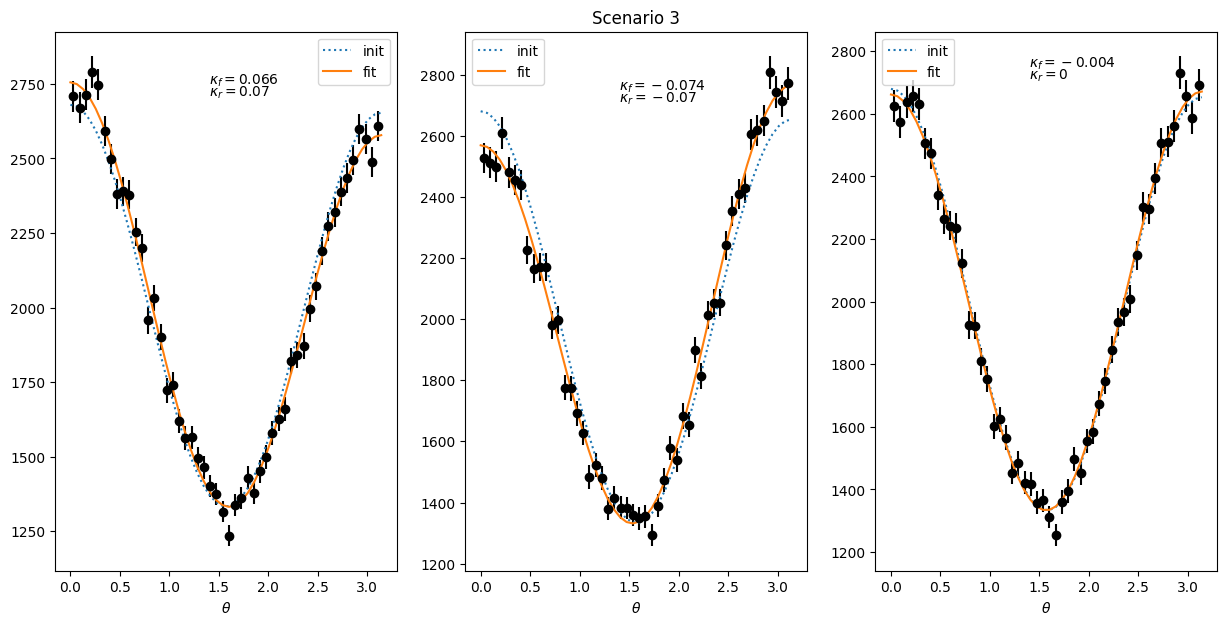

In [177]:
#Investigate the fit process in scenario 3
print(m1s3.params)
print(m2s3.params)
print(m3s3.params)
print("reduced chi2=", m1s3.fval / (len(n1s3) - m1s3.nfit) )
print("reduced chi2=", m2s3.fval / (len(n2s3) - m2s3.nfit) )
print("reduced chi2=", m3s3.fval / (len(n3s3) - m3s3.nfit) )
pl.rcParams['figure.figsize'] = [15, 7]
pl.subplot(1,3,1)
cx1s3 = 0.5 * (xe1s3[1:] + xe1s3[:-1])
dx1s3 = np.diff(xe1s3)
plt.errorbar(cx1s3, n1s3, n1s3 ** 0.5, fmt="ok")
xm1s3 = np.linspace(xe1s3[0], xe1s3[-1])
plt.plot(xm1s3, pdf(xm1s3, *[p.value for p in m1s3.init_params]) * len(s3xr1) * dx1s3[0],
         ls=":", label="init")
plt.plot(xm1s3, pdf(xm1s3, *m1s3.values) * len(s3xr1) * dx1s3[0], label="fit")
plt.legend();
plt.text(1.4,2750,"$\kappa_{f}=0.066$")
plt.text(1.4,2710,"$\kappa_{r}=0.07$")
plt.xlabel(r"$\theta$")
pl.subplot(1,3,2)
cx2s3 = 0.5 * (xe2s3[1:] + xe2s3[:-1])
dx2s3 = np.diff(xe2s3)
plt.errorbar(cx2s3, n2s3, n2s3 ** 0.5, fmt="ok")
xm2s3 = np.linspace(xe2s3[0], xe2s3[-1])
plt.plot(xm2s3, pdf(xm2s3, *[p.value for p in m2s3.init_params]) * len(s3xr2) * dx2s3[0],
         ls=":", label="init")
plt.plot(xm2s3, pdf(xm2s3, *m2s3.values) * len(s3xr2) * dx2s3[0], label="fit")
plt.legend();
plt.text(1.4,2750,"$\kappa_{f}=-0.074$")
plt.text(1.4,2710,"$\kappa_{r}=-0.07$")
plt.xlabel(r"$\theta$")
plt.title("Scenario 3")
pl.subplot(1,3,3)
cx3s3 = 0.5 * (xe3s3[1:] + xe3s3[:-1])
dx3s3 = np.diff(xe3s3)
plt.errorbar(cx3s3, n3s3, n3s3 ** 0.5, fmt="ok")
xm3s3 = np.linspace(xe3s3[0], xe3s3[-1])
plt.plot(xm3s3, pdf(xm3s3, *[p.value for p in m3s3.init_params]) * len(s3xr3) * dx3s3[0],
         ls=":", label="init")
plt.plot(xm3s3, pdf(xm3s3, *m3s3.values) * len(s3xr3) * dx3s3[0], label="fit")
plt.legend();
plt.text(1.4,2750,"$\kappa_{f}=-0.004$")
plt.text(1.4,2710,"$\kappa_{r}=0$")
plt.xlabel(r"$\theta$")